<p style="text-align: center;"> <span style="color:firebrick"> <font size="5"> <b> USC Marshall School of Business </b> </font> </p> </span> 

<p style="text-align: center;"> <b> <font font size="4"> DSO 545- Quiz 2 </p> </b></font>

<p style="text-align: center;"> <b> Fall 2020 </b> </p>
<p style="text-align: center;"> <b> <span style="color:firebrick"> Deadline: </span> Sunday, Oct 25 (EOD) </b> </p>

# Quiz Rules

- This quiz is open notes and open book (including the Internet)

- This quiz does not have a time limit. You can start it anytime during this week and finish it anytime as long as you submit it by the deadline on Sunday Oct 225, 2020 (End of Day). 

- You are not allowed to interact with any person except your DSO 545 final project group. If you have any questions related to the quiz, you can only discuss with your DSO 545 final project group only with the following two conditions:
    
    - You are expected to work on all the problems on your own first (before you reach out to your group), and submit a first version of the quiz on blackboard. This first submission is to show that you have done the work on your own before you reach out to the group.

    - Once you submit your work to blackboard, then you can meet with your group and ask them questions related to the quiz. If you want to change anything to your initial submission, then you can do so, and submit a second version to blackboard using the same submission link before the deadline (Oct 25 EOD)



# Important

 Please sign here (type your name) to indicate that you have adhered to university policies regarding ethical behavior in preparing for and completing this test:
 
 <span style="color:black"> **I hereby certify that I have adhered to the USC's policies regarding ethical behavior in preparing for and completing this quiz. I certify that I will also adhere to the rules in the section above (Quiz Rules)** </span>

## <span style="color:black">  Sign your name here </span>: Bufan Wang

# <span style="color:black"> Case Study: </span>  <span style="color:firebrick"> Trojan Paper </span>

**Trojan Paper** manufactures paper products and sells them to newspapers, magazines, and other print industry businesses.  Recently, there have been growing concerns that customers are dissatisfied with their services, so **Trojan Paper** decided to hire a consulting company called **Research Analytics** to survey their customers, and analyze the data.  

**Trojan Paper** hopes to use the results of the survey for formulating a long-term plan to improve their business, and better serve their customers.  


### <span style="color:black"> Dataset: </span>  <span style="color:firebrick"> Trojan Paper </span>

The suvery was sent to all their customers (newspapers, magazines, etc.). Among the customers surveyed, **Research Analytics** collected a total of 100 responses. The data is saved in the file `trojanpaper_survey.csv`:

|**Variables**    |**Explanation**|
|:-----------------|:--------------|
|`Newspaper` | A binary indicating if the customer is a newspaper (1 = Yes, 0=No) 
|`Firm size`| A binary variable indicating if the customer has more than 500 employees (1=Yes, 0=No) 


**Research Analytics** then asked each respondent to rate **Trojan Paper**’s services on a scale from 1 to 10 (10 being the best) on 5 different attributes:

|**Variables**    |**Explanation**|
|:-----------------|:--------------|
|`Product quality` | Perceived quality Trojan Paper’s paper products
|`Technical support` | Ability of technical support to help resolve product and service issues
|`Salesforce` | Overall professionalism and helpfulness of Trojan Paper’s sales force
|`New Product Development` | Ability of Trojan Paper to design new, custom products to meet customer specifications
|`Delivery` | Extent to which Trojan Paper delivers orders on time. 



### <span style="color:black"> Questions: </span>  <span style="color:firebrick"> Trojan Paper </span>

In [1]:
# import all necessary python packages here
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import cluster
from scipy import stats

#### Read data

In [2]:
# read the data here, and save it in a dataframe called 'paper'
paper = pd.read_csv('trojanpaper_survey.csv')
paper.head()

,Newspaper,Firm size,Product quality,Technical support,Sales force,New product development,Delivery
0,0,1,8.5,2.5,6.0,4.3,3.7
1,1,0,8.2,5.1,3.1,4.0,4.9
2,0,1,9.2,5.6,5.8,4.6,4.5
3,1,1,6.4,7.0,4.5,3.6,3.0
4,0,1,9.0,5.2,4.5,4.5,3.5


#### Question 1

Standardize all columns of data so that each column has mean 0 and std 1. Save the standardized data in pandas DataFrame called `z_paper`.

In [3]:
scaler = StandardScaler()
z_paper = scaler.fit_transform(paper)
z_paper = pd.DataFrame(z_paper ,columns = paper.columns)
z_paper.head()

,Newspaper,Firm size,Product quality,Technical support,Sales force,New product development,Delivery
0,-0.960769,0.980196,0.496660,-1.881421,0.821973,-0.572173,-0.254531
1,1.040833,-1.020204,0.280721,-0.174023,-1.896068,-0.774117,1.387605
2,-0.960769,0.980196,1.000518,0.154322,0.634522,-0.370230,0.840226
3,1.040833,0.980196,-1.014914,1.073690,-0.583910,-1.043375,-1.212443
4,-0.960769,0.980196,0.856559,-0.108354,-0.583910,-0.437544,-0.528220


#### Question 2

We will first use visual inspection to figure out the number of clusters among our customers. Since the number of variables in our dataset is larger than 2, then we won't be able to visualize all the data unless if we perform a PCA decomposition on our data to reduce the dimensionality in our dataset. 

Perform `PCA` decomposition on the standardized survey data into 2 Principle Components (n_component = 2). Save the two Principle Components (PC's)in a dataframe called `pca_data`. 

In [4]:
pca = PCA(n_components = 2)
pc = pca.fit_transform(z_paper)
pca_data = pd.DataFrame(data = pc, columns = ['PCA1','PCA2'])
pca_data.head()

,PCA1,PCA2
0,1.239308,0.009731
1,-1.430879,-0.351388
2,1.124728,0.714626
3,-0.745247,-1.825271
4,-0.116982,0.600109


#### Question 3

What is the % of variation explained by the 2 PCs combined? 

In [5]:
# 2 PCs combined to explain around 41% of variation
pca.explained_variance_ratio_

array([0.22069266, 0.18508285])

#### Question 4

Create a 2-D scatter plot to visualize the 2 PCs on one graph. Is it easy to see a clear separation among clusters?

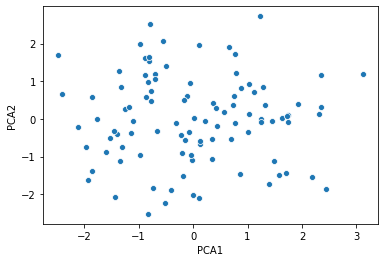

In [6]:
# No, there is no clear separation among clusters.
sns.scatterplot(data = pca_data, x = 'PCA1',y = 'PCA2')

#### Question 5

Sometimes it is hard to inspect the number of clusters even after we perform dimensionality reduction using PCA. 

Another method to find out the number of clusters (k) for `k-means` clustering algorithm is to create an Elbow plot. 

- Create an Elbow plot with k between 2 and 10. 
- What does the plot say about the optimal number of clusters? **Why?** (Elbow interpretation is very subjective. As long as your logic is fine, then you will get full credit.)

For the `KMeans` method, use `random_state = 1000`. 

[584.2316780680015, 515.3371857227285, 469.753394771243, 434.1168130833128, 397.03676279513445, 364.56023522201394, 334.8024984171213, 313.1354864180292, 292.84851391184725]


Text(0.5, 1.0, 'Elbow Plot')

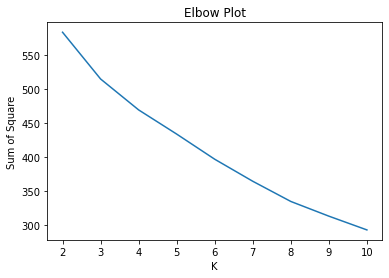

In [7]:
# There is no clear elbow in the elbow plot. I would say four is the optimal number of clusters because it results
# a low and acceptable sum of square without causing too much confusions (too many clusters can cause confusion.)
ss = []
for i in range(2,11):
    model = cluster.KMeans(n_clusters = i, random_state = 1000)
    model.fit(z_paper)
    ss.append(model.inertia_)
print(ss)
elbow = pd.DataFrame({'K':range(2,11),'Sum of Square': ss})
sns.lineplot(data = elbow, x = 'K',y = 'Sum of Square')
plt.title('Elbow Plot')

#### Question 6

Choose `k = 4`, and run k-means on the customer responses. Add a `cluster` column to the `pca_data` dataframe created in question 2.

For the `KMeans` method, use `random_state = 1000`. 

In [8]:
model = cluster.KMeans(n_clusters = 4, random_state = 1000)
pca_data['cluster'] = model.fit_predict(z_paper)
pca_data.head()

,PCA1,PCA2,cluster
0,1.239308,0.009731,3
1,-1.430879,-0.351388,1
2,1.124728,0.714626,3
3,-0.745247,-1.825271,1
4,-0.116982,0.600109,3


In [9]:
z_paper.head()

,Newspaper,Firm size,Product quality,Technical support,Sales force,New product development,Delivery
0,-0.960769,0.980196,0.496660,-1.881421,0.821973,-0.572173,-0.254531
1,1.040833,-1.020204,0.280721,-0.174023,-1.896068,-0.774117,1.387605
2,-0.960769,0.980196,1.000518,0.154322,0.634522,-0.370230,0.840226
3,1.040833,0.980196,-1.014914,1.073690,-0.583910,-1.043375,-1.212443
4,-0.960769,0.980196,0.856559,-0.108354,-0.583910,-0.437544,-0.528220


#### Question 7

Create 2-D Scatter plot to visualize 2 PCs like you did in Q4 but color them based on the cluster labels added in Q6.

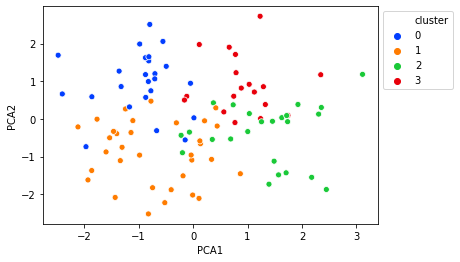

In [10]:
sns.scatterplot(data = pca_data,x = 'PCA1',y = 'PCA2',hue = 'cluster', palette = 'bright')
plt.legend(bbox_to_anchor = [1, 1],loc = 2)

#### Question 8

Repeat question 6 and 7, but now use `k=3` and `k=5`. Based on the visual results, which is better `k=3`, `k=4`, or `k=5`? **What was the reasoning for your choice**? 

- I will choose k=3. From my perspective, when k=3, the pattern of clusters is the clearest, with the least amount of overlaps between clusters. When k=4 and k=5, there are a lot of overlaps between clusters so that it is relatively more difficult to idenfity each cluster.

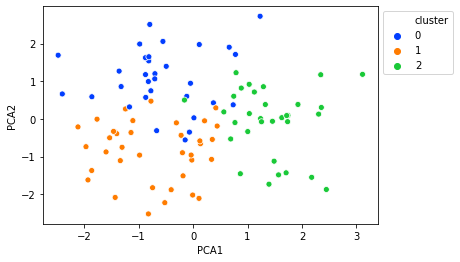

In [11]:
# k = 3
model = cluster.KMeans(n_clusters = 3, random_state = 1000)
pca_data['cluster'] = model.fit_predict(z_paper)
sns.scatterplot(data = pca_data,x = 'PCA1',y = 'PCA2',hue = 'cluster', palette = 'bright')
plt.legend(bbox_to_anchor = [1, 1],loc = 2)

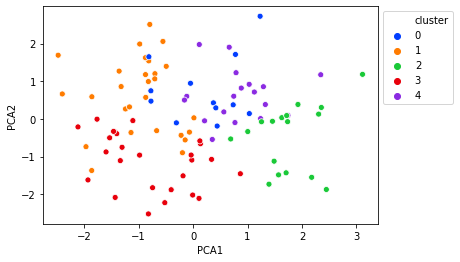

In [12]:
# k = 5
model = cluster.KMeans(n_clusters = 5, random_state = 1000)
pca_data['cluster'] = model.fit_predict(z_paper)
sns.scatterplot(data = pca_data,x = 'PCA1',y = 'PCA2',hue = 'cluster', palette = 'bright')
plt.legend(bbox_to_anchor = [1, 1],loc = 2)

In [13]:
z_paper.head()

,Newspaper,Firm size,Product quality,Technical support,Sales force,New product development,Delivery
0,-0.960769,0.980196,0.496660,-1.881421,0.821973,-0.572173,-0.254531
1,1.040833,-1.020204,0.280721,-0.174023,-1.896068,-0.774117,1.387605
2,-0.960769,0.980196,1.000518,0.154322,0.634522,-0.370230,0.840226
3,1.040833,0.980196,-1.014914,1.073690,-0.583910,-1.043375,-1.212443
4,-0.960769,0.980196,0.856559,-0.108354,-0.583910,-0.437544,-0.528220


#### Question 9

Going forward (**questions 9-11**), we will choose `k=3` for our clusters. Which of the customer clusters have the most number of customers in it? 

In [14]:
# Cluster 1 has the most number of customers.
model = cluster.KMeans(n_clusters = 3, random_state = 1000)
z_paper['cluster'] = model.fit_predict(z_paper)
z_paper['cluster'].value_counts()

1    37
2    32
0    31
Name: cluster, dtype: int64

#### Question 10

How would you describe the **average** customer in the largest customer cluster (question 9) to your boss/client in words?  (Hint:  Describe the customers in the cluster with respect to their type (are they mostly newspapers or not?) and size of business but not their perceptions about Trojan Paper).

In [15]:
# In the largest cluster, all customers are newspaper, and around 35% of then have large firm size (> 500)
# have large firm size.
paper['cluster'] = z_paper['cluster']
paper.loc[paper['cluster'] == 1, ['Newspaper','Firm size']].mean()

Newspaper    1.000000
Firm size    0.351351
dtype: float64

#### Question 11

**Trojan Paper** leadership believes that retaining large firm customers is a high priority. 

- On average, what perception do the large firm customers have on **Trojan Paper**: product quality, technical support, sales force, new product development, and delivery?
- Based on your analysis, which areas should **Trojan Paper** improve upon to satisfy their large customers.

In [16]:
# Overall, large firms are satisified with product quality (7.67/10), but there is still space for improvement in product quality. 
# Trojan paper should focus on improving delivery, which has a poor score(3.97/10). 
# Also, Trojan paper should pay attention on Technical support, Sales force,
# and New product development because these services all have a score around 5, which is not a decent score.
paper.loc[paper['Firm size'] == 1].mean()

Newspaper                  0.431373
Firm size                  1.000000
Product quality            7.672549
Technical support          5.101961
Sales force                5.425490
New product development    5.117647
Delivery                   3.972549
cluster                    1.392157
dtype: float64

# <span style="color:black"> Case Study 2: </span>  <span style="color:firebrick"> Trojan Electronics </span>

**Trojan Electronics** is an electronics distributor, who is looking for your analytics support as an analytics expert. The shipping manager of **Trojan Electronics** is considering a new route from the warehouse to a retail store using an inner-city route. The new route uses freeways that bypass the city with the hope that the mean time to make the trip on this new route will be less than the mean time to make the trip on the current route.

### <span style="color:black"> Dataset: </span>  <span style="color:firebrick"> Trojan Electronics </span>

A random sample of 25 delivery times for each route is collected. The data is saved in the file `delivery_routes.csv`:

|**Variables**    |**Explanation**|
|:-----------------|:--------------|
|`Delivery ID`| delivery id|
|`Route`|route type (current, old)|
|`Time`|amount of time (minutes) to make the delivery from the warehouse to the retail store|


### <span style="color:black"> Questions: </span>  <span style="color:firebrick"> Trojan Electronics </span>

#### Read data

In [17]:
delivery = pd.read_csv('delivery_routes.csv')
delivery.head()

,Delivery ID,Route,Time
0,1816,new,37
1,3980,new,42
2,1867,current,41
3,3036,current,49
4,2659,new,39


#### Question 12

Describe the delivery time for the two routes to the shipping manager by stating the mean, standard deviation, and range of delivery times for both the current and new route.

In [18]:
# Current route has mean delivery time of 51.36, standard deviation of 5.78, and range of 18.
# New route has mean delivery time of 40.6, standard deviation of 4.06, and range of 15.
delivery.groupby('Route').agg({'Time':['mean','std',lambda x: x.max()-x.min()]})

Time                     
          mean       std <lambda_0>
Route                              
current  51.36  5.779850         18
new      40.60  4.062019         15

#### Question 13

Create a side-by-side box plot to compare the distribution of delivery times for the current and new route. **What information can you get from this graph regarding the delivery times for the new and current route?**

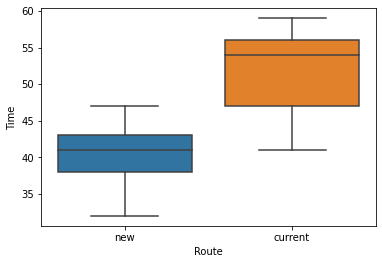

In [19]:
sns.boxplot(data = delivery, x = 'Route', y = 'Time')
# Overall, new route has smaller delivery time than that of current route.
# The minimum delivery time of current route is equal to the median delivery time of new route.
# The maximum delivery time of new route is equal to the 25 percentile of delivery time of current route.
# 50% of delivery time of new route is between 37.5 and 42.5
# 50% of delivery time of current route is between 47.5 and 56.

#### Question 15

This shipping manger believes that the new route is faster than the current route used to deliver from the warehouse to the retail store. 

Use the A/B testing approach to determine whether or not the shipping manager is right in her assumption. 

**(a)** State your $H_0$ and $H_A$.

**(b)** What is the p-value associated with the observed value of the test statistic you have used in the A/B testing process? You can assume equal variance for the current and new delivery times.

**(c)** Would you recommend the shipping manager to make the change to the new route (you can assume the new route involves no additional costs)? **Why?**


#### (a)
- $H_0$: current route and new route have similar delivery time
- $H_A$: current route has higher delivery time than that of new route

#### (b)

In [20]:
t,p = stats.ttest_ind(delivery.loc[delivery['Route'] == 'current', 'Time'].values,
                     delivery.loc[delivery['Route'] == 'new', 'Time'].values,
                     equal_var = True)
p

8.429760762923315e-10

#### (c)
- Yes, I would recommend the shipping manager to change to new route because the p-value is less than 0.05, which means that I have significant evidence to reject $H_0$ and conclude that current route has higher delivery time than that of new route.